In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from pandas import *

In [2]:
from sklearn.datasets import load_breast_cancer

data_cancer = load_breast_cancer()
X = data_cancer['data']
y = data_cancer['target']

print list(data_cancer['target_names'])
print list(data_cancer['feature_names'])

['malignant', 'benign']
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


<IPython.core.display.Javascript object>


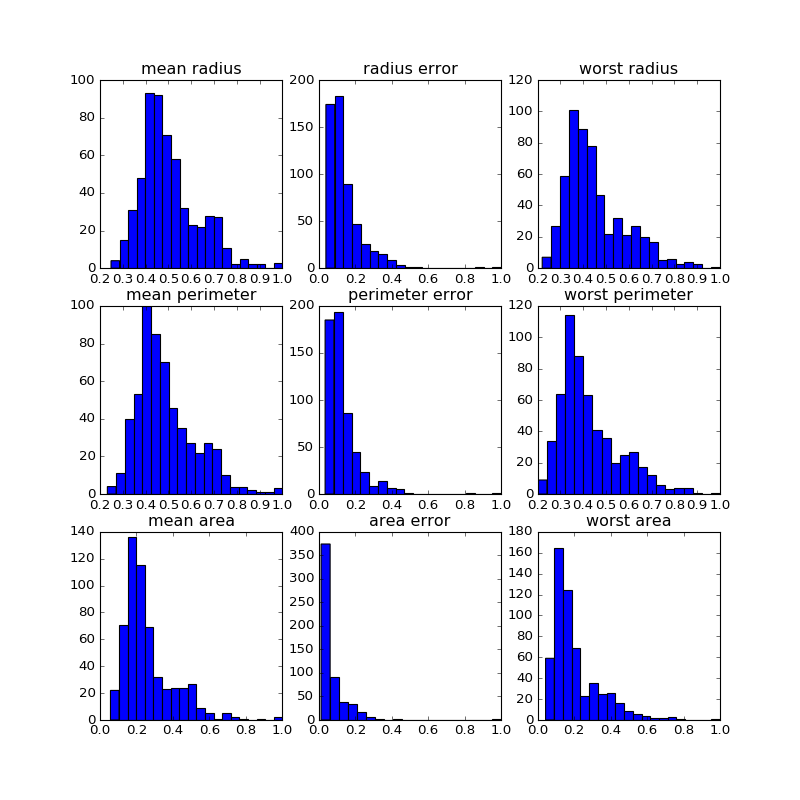

In [12]:
import matplotlib.pyplot as plt
% matplotlib notebook

count = 1
plt.figure('histograms', figsize=(10,10))
for k in [0,2,3]:
    plt.subplot(3,3,count)
    plt.title(data_cancer['feature_names'][k])
    plt.hist(X[:,k], bins = 20)
    #plt.axis('off')
    count += 1
    plt.subplot(3,3,count)
    plt.title(data_cancer['feature_names'][k+10])
    plt.hist(X[:,k+10], bins = 20)
    #plt.axis('off')
    count += 1
    plt.subplot(3,3,count)
    plt.title(data_cancer['feature_names'][k+20])
    plt.hist(X[:,k+20], bins = 20)
    #plt.axis('off')
    count += 1
    
plt.show()

In [4]:
X_train = X[:int(0.75*len(X))]
X_test = X[int(0.75*len(X)):]

y_train = y[:int(0.75*len(y))]
y_test = y[int(0.75*len(y)):]

In [5]:
from tqdm import tqdm
    
accs = []
for k in tqdm(range(50)):
    KNN_classifier = KNeighborsClassifier(n_neighbors=k+1, weights='uniform' ,n_jobs=-1)
    KNN_classifier.fit(X_train, y_train)
    y_pred = KNN_classifier.predict(X_test)
    accs.append(accuracy_score(y_test, y_pred))

100%|██████████| 50/50 [00:07<00:00,  6.98it/s]


In [6]:
accs2 = []
for k in tqdm(range(50)):
    KNN_classifier = KNeighborsClassifier(n_neighbors=k+1, weights='distance' ,n_jobs=-1)
    KNN_classifier.fit(X_train, y_train)
    y_pred = KNN_classifier.predict(X_test)
    accs2.append(accuracy_score(y_test, y_pred))

100%|██████████| 50/50 [00:07<00:00,  7.11it/s]


<IPython.core.display.Javascript object>


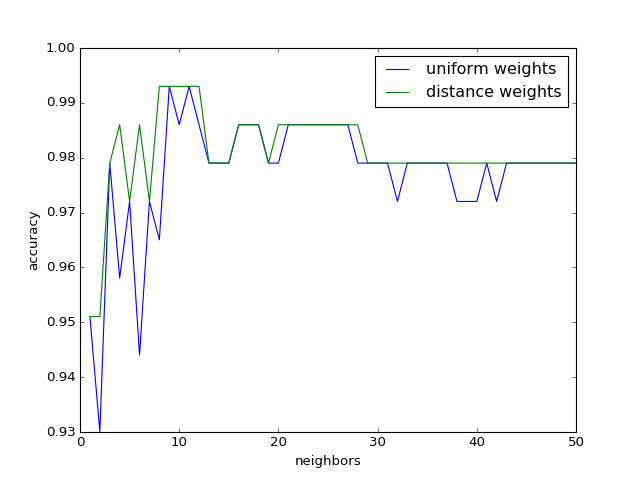

In [14]:
import matplotlib.pyplot as plt
% matplotlib notebook
fig = plt.figure('accuracy')
plt.plot(range(1, len(accs)+1), accs, label='uniform weights')
plt.plot(range(1, len(accs2)+1), accs2, label='distance weights')
plt.legend(loc='best')
plt.xlabel('neighbors')
plt.ylabel('accuracy')

plt.show()
fig.savefig('KNN accuracy.png')



In [8]:
X = data_cancer['data']
y = data_cancer['target']

#нормализуем признаки
X = [X[:,k]/np.max(X[:,k]) for k in np.arange(len(data_cancer['feature_names']))]
X = np.array(X).T

In [9]:
X_train = X[:int(0.75*len(X))]
X_test = X[int(0.75*len(X)):]

y_train = y[:int(0.75*len(y))]
y_test = y[int(0.75*len(y)):]

In [10]:
accs = []
for k in tqdm(range(50)):
    KNN_classifier = KNeighborsClassifier(n_neighbors=k+1, weights='uniform' ,n_jobs=-1)
    KNN_classifier.fit(X_train, y_train)
    y_pred = KNN_classifier.predict(X_test)
    accs.append(accuracy_score(y_test, y_pred))
    
accs2 = []
for k in tqdm(range(50)):
    KNN_classifier = KNeighborsClassifier(n_neighbors=k+1, weights='distance' ,n_jobs=-1)
    KNN_classifier.fit(X_train, y_train)
    y_pred = KNN_classifier.predict(X_test)
    accs2.append(accuracy_score(y_test, y_pred))

100%|██████████| 50/50 [00:07<00:00,  6.99it/s]


<IPython.core.display.Javascript object>


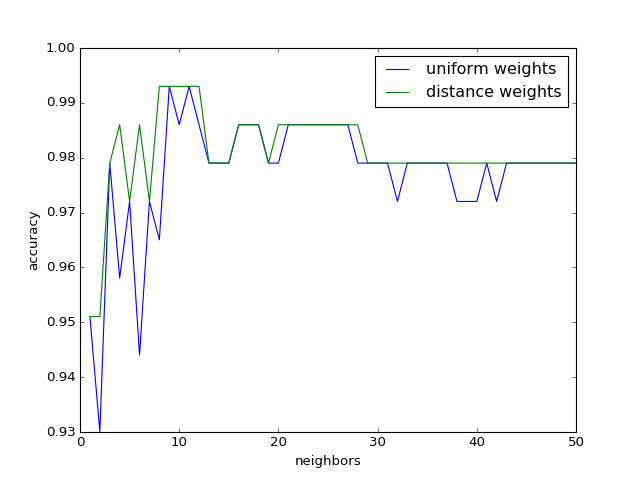

In [11]:
import matplotlib.pyplot as plt
% matplotlib notebook
fig = plt.figure('accuracy')
plt.plot(range(1, len(accs)+1), accs, label='uniform weights')
plt.plot(range(1, len(accs2)+1), accs2, label='distance weights')
plt.legend(loc='best')
plt.xlabel('neighbors')
plt.ylabel('accuracy')

fig.savefig('KNN accuracy2.png')

